# Regression Model Building and Testing
#### Assumptions: all variables are iid, normally distributed
#### ----Split data in training and testing sets.

### 1. Possible Pattern in Data  
a. Test if the data follows a normal distributions 
    Q-Q plot - Quantile Quantile

b. Data Normalization ((d-mean)/std)
   Split both original and normalized datasets into training and testing sets
   
---------------
### 2. Model Fitting and Evaluation
a. Bi-variate regression on each regressors (on training set)

b. Multivariate linear regression on all regressors (on training set)
    
c. Ridge Regression (4 fold cv)

d. Lasso Regression (4 fold cv)

---------------
### 3. Further Study and Efforts
a*. OLS regression model with polynomial regressors(x)

b*. # OLS regression model with transformed y 
   * Boxcox - to check if y should be transformed to polygomial or ln

-------------------------------------

In [1]:
import numpy as np
import pandas as pd
from pandas.stats.api import ols

#import Quandl
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Possible Pattern in Data

In [2]:
master = pd.read_csv('../data/processed/master.csv')

In [3]:
master.head()

,station_id,ridership_0115,ridership_0215,ridership_0315,ridership_0415,ridership_0515,ridership_0615,ridership_0715,ridership_0815,ridership_0915,...,ridership_1215,avg_ridership_2015,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density
0,72,638.0,480.0,1026.0,1948.0,2943.0,2767.0,3149.0,3504.0,3667.0,...,1648.0,2131.615385,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807
1,79,566.0,335.0,725.0,1728.0,2368.0,2424.0,2626.0,2726.0,3011.0,...,1579.0,1760.538462,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631
2,82,310.0,276.0,406.0,788.0,1068.0,946.0,1193.0,1145.0,1166.0,...,713.0,766.538462,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511
3,83,258.0,162.0,281.0,749.0,1101.0,994.0,1659.0,1724.0,1505.0,...,717.0,863.307692,0.0,0.0,7.500000,0.0,0.000000,41976.000000,85199.000000,0.000231
4,116,1696.0,1193.0,2105.0,1933.0,2281.0,4800.0,5674.0,6175.0,6558.0,...,3686.0,3576.692308,4.0,1.0,8.500000,0.0,47.824344,15948.000000,104974.000000,0.000742


In [156]:
master.bike_lane_score.unique()

array([ 0.        ,  3.        ,  4.        ,  1.85714286,  2.5       ,
        2.        ,  1.        ,  2.33333333,  3.5       ,  4.33333333,
        3.66666667,  3.16666667,  3.125     ,  1.8       ,  3.8       ,
        5.        ,  4.3       ,  2.75      ,  3.25      ,  2.27272727,
        3.6       ,  2.66666667,  3.18181818,  3.4       ,  3.33333333,
        3.2       ,  1.66666667,  3.75      ,  1.5       ,  3.375     ,
        4.77777778,  2.2       ,  1.75      ,  4.71428571])

In [4]:
master.shape

(452, 22)

In [8]:
# Create a new data frame with stationID, riderships in month 6-10, and all study features
df0 = master[['station_id','ridership_0615','ridership_0715','ridership_0815','ridership_0915','ridership_1015',\
              'bike_lane_score', 'park', 'street_quality_score', 'subway_entrance', 'tree_score', 'traffic_volume',\
              'median_hh_income', 'pop_density']]

In [9]:
df0.head(3)

,station_id,ridership_0615,ridership_0715,ridership_0815,ridership_0915,ridership_1015,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density
0,72,2767.0,3149.0,3504.0,3667.0,3546.0,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807
1,79,2424.0,2626.0,2726.0,3011.0,2646.0,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631
2,82,946.0,1193.0,1145.0,1166.0,1053.0,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511


In [10]:
df0.subway_entrance.unique()

array([ 0.,  1.])

## a. Q-Q plot   ---(move to the  part b)
#### Check if data is normal
Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.

Generates a probability plot of sample data against the quantiles of a
specified theoretical distribution (the normal distribution by default).
`probplot` optionally calculates a best-fit line for the data

**---R-squared of data being normalaly distribuated--**
1. 'bike_lane_score' : R_2 = 0.81
2. 'park': R_2 = 0.63 -----------------> low value
3. 'street_quality_score': R_2 = 0.96
4. 'subway_entrance': R_2 = 0.39 ---> very low, not likely to be a normal distributions
5. 'tree_score' : R_2 = 0.95
6. 'traffic_volume': R_2 = 0.71
 
7. 'median_hh_income': R_2 = 0.81
8. 'pop_density': R_2 = 0.97

In [215]:
#sm.qqplot(df0.ix[:,6], fit=True, line='q', ax=None)

((array([ -2.96117551e+00,  -2.67653933e+00,  -2.51628594e+00,
          -2.40255243e+00,  -2.31336993e+00,  -2.23949821e+00,
          -2.17614091e+00,  -2.12047587e+00,  -2.07069676e+00,
          -2.02557504e+00,  -1.98423579e+00,  -1.94603306e+00,
          -1.91047582e+00,  -1.87718177e+00,  -1.84584720e+00,
          -1.81622671e+00,  -1.78811900e+00,  -1.76135687e+00,
          -1.73579986e+00,  -1.71132878e+00,  -1.68784157e+00,
          -1.66525018e+00,  -1.64347805e+00,  -1.62245822e+00,
          -1.60213174e+00,  -1.58244645e+00,  -1.56335594e+00,
          -1.54481877e+00,  -1.52679774e+00,  -1.50925933e+00,
          -1.49217326e+00,  -1.47551202e+00,  -1.45925059e+00,
          -1.44336614e+00,  -1.42783775e+00,  -1.41264621e+00,
          -1.39777387e+00,  -1.38320443e+00,  -1.36892283e+00,
          -1.35491510e+00,  -1.34116830e+00,  -1.32767037e+00,
          -1.31441010e+00,  -1.30137700e+00,  -1.28856128e+00,
          -1.27595378e+00,  -1.26354588e+00,  -1.251329

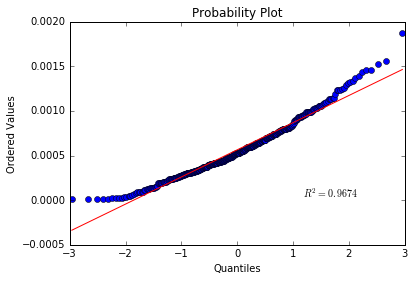

In [217]:
measurements = df0.ix[:,13]
stats.probplot(measurements, dist="norm", plot=plt)

### Based on the R-squared values of Q-Q plot, as the analyses will be based on the asssumption that the data follows a "normal distribution", we drop "Park" and "Subway Entrances".

In [220]:
df0 = df0.ix[:, ~df0.columns.isin(['park', 'subway_entrance'])]
df0.head(3)

,station_id,ridership_0615,ridership_0715,ridership_0815,ridership_0915,ridership_1015,bike_lane_score,street_quality_score,tree_score,traffic_volume,median_hh_income,pop_density
0,72,2767.0,3149.0,3504.0,3667.0,3546.0,0.0,8.000000,17.364799,14870.500000,90174.000000,0.000807
1,79,2424.0,2626.0,2726.0,3011.0,2646.0,3.0,8.571429,9.573955,9484.666667,86523.139535,0.000631
2,82,946.0,1193.0,1145.0,1166.0,1053.0,0.0,7.333333,35.070325,16812.500000,73988.000000,0.000511


## b. Data Normalization

In [221]:
# Nomalize columns that are numeric(continuous values) 
# using (X - Xmin)/ (Xmax - Xmin)
df0_n = df0.copy()

In [222]:
def normalize1(df1, df0, col):
    col_mean = df0[col].mean()
    col_std = df0[col].std()
    df1[col] = df0[col].apply(lambda c: (c - col_mean) / col_std)
    return col_mean, col_std

In [224]:
# Create a dictionaly that stores all the max and min values of the selected columns' original values
col_n = ['ridership_0615', 'ridership_0715','ridership_0815', 'ridership_0915','ridership_1015', 
        'bike_lane_score', 'street_quality_score', 'tree_score', 'traffic_volume', 'median_hh_income', 'pop_density']
col_meanstd = {}
for c in col_n:
    vmean, vstd = normalize1(df0_n, df0, c)
    col_meanstd[c] = np.array([vmean, vstd])

In [225]:
df0_n.head()

,station_id,ridership_0615,ridership_0715,ridership_0815,ridership_0915,ridership_1015,bike_lane_score,street_quality_score,tree_score,traffic_volume,median_hh_income,pop_density
0,72,-0.044803,-0.053536,0.290089,0.380089,0.450563,-1.037727,0.790673,-0.554668,0.001493,1.069154e-01,0.791144
1,79,-0.223134,-0.296086,-0.030448,0.089412,0.014532,0.722092,1.584334,-0.904716,-0.424358,2.130764e-15,0.218505
2,82,-0.991566,-0.960664,-0.681822,-0.728118,-0.757243,-1.037727,-0.135265,0.240854,0.155045,-3.670914e-01,-0.170810
3,83,-0.966611,-0.744548,-0.443273,-0.577905,-0.732535,-1.037727,0.096220,-1.334880,2.144695,-3.877741e-02,-1.079345
4,116,1.012182,1.117474,1.390545,1.661106,1.554691,1.308698,1.485126,0.813900,0.086690,5.403333e-01,0.581773


In [226]:
col_meanstd = pd.DataFrame(col_meanstd.items(), columns=['column', 'mean_std'])

In [227]:
col_meanstd

,column,mean_std
0,traffic_volume,"[14851.6123426, 12647.1984179]"
1,ridership_0915,"[2809.21596244, 2256.80019503]"
2,street_quality_score,"[7.43072263697, 0.719991027548]"
3,pop_density,"[0.000563480999822, 0.000307600288934]"
4,ridership_0615,"[2853.17434211, 1923.39534573]"
5,bike_lane_score,"[1.76903484912, 1.70472136158]"
6,ridership_0715,"[3264.43831169, 2156.25780748]"
7,ridership_0815,"[2799.9025641, 2427.17614563]"
8,tree_score,"[29.7097648459, 22.2565097196]"
9,ridership_1015,"[2616.00456621, 2064.07254231]"


In [228]:
lm_n = smf.ols(formula = 'ridership_0615 ~ \
                        bike_lane_score + street_quality_score + tree_score + traffic_volume +\
                        median_hh_income + pop_density', \
                        data = df0_n).fit()

In [229]:
lm_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ridership_0615   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     8.232
Date:                Mon, 05 Dec 2016   Prob (F-statistic):           2.97e-08
Time:                        19:35:49   Log-Likelihood:                -407.47
No. Observations:                 304   AIC:                             828.9
Df Residuals:                     297   BIC:                             855.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               -0.0511      0.054     -0.938      0.349        -0.158     0.056
bike_lane_score          0.1246      0.055      2.256      0.025         0.016     0.233
street_quality_score    -0.0674      0.054     -1.254      0.211        -0.173     0.038
tree_score              -0.1217      0.055     -2.215      0.028        -0.230    -0.014
traffic_volume           0.0162      0.051      0.319      0.750        -0.084     0.116
median_hh_income         0.2659      0.054      4.928      0.000         0.160     0.372
pop_density              0.2270      0.058      3.915      0.000         0.113     0.341
==============================================================================
Omnibus:                       56.258   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.478
Skew:                           1.048   Prob(JB):                     3.05e-21
Kurtosis:                       4.750   Cond. No.                         1.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The R-squared is too small

### Set Training and Testing Sets - with built-in cross validation (4 folds)

In [231]:
# drop nan-- normalized data
df0_nV = df0_n.dropna(subset=['ridership_0615', 'bike_lane_score', 'street_quality_score', 'tree_score', 'traffic_volume',\
              'median_hh_income', 'pop_density'])
df0_nV.shape

(304, 12)

In [232]:
# # drop nan-- original data
df0_V = df0.dropna(subset=['ridership_0615', 'bike_lane_score', 'street_quality_score', 'tree_score', 'traffic_volume',\
              'median_hh_income', 'pop_density'])
df0_V.shape

(304, 12)

In [237]:
######## Set traning and Testing sets on standardized data
X0n = df0_nV[['bike_lane_score', 'street_quality_score', 'tree_score', 'traffic_volume',\
              'median_hh_income', 'pop_density']]
y0n = df0_nV[['ridership_0615']]

In [238]:
X0n.shape

(304, 6)

In [239]:
# for standardized data
X0n_train, X0n_test, y0n_train, y0n_test = train_test_split(X0n, y0n, test_size = 0.3, random_state = 222)

X0n_train.shape, X0n_test.shape, y0n_train.shape, y0n_test.shape

((212, 6), (92, 6), (212, 1), (92, 1))

In [240]:
# Stack X0n and y0n for convience
Xyn_train = pd.concat([y0n_train, X0n_train], axis=1)
Xyn_test = pd.concat([y0n_test, X0n_test], axis=1)
Xyn_test.head(3)

,ridership_0615,bike_lane_score,street_quality_score,tree_score,traffic_volume,median_hh_income,pop_density
31,0.721550,-1.037727,-1.987140,-0.516935,0.506625,0.674546,-0.442814
80,0.287942,-1.037727,0.443446,1.067589,-0.795402,-0.742935,-0.779040
206,1.008022,-0.451121,0.790673,0.065821,-0.773184,-0.742935,1.120013


In [243]:
######## Set traning and Testing sets on original data
X0 = df0_V[['bike_lane_score', 'street_quality_score','tree_score', 'traffic_volume',\
              'median_hh_income', 'pop_density']]
y0 = df0_V[['ridership_0615']]

In [244]:
# for original data
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.3, random_state = 222)
# Check the shapes of each 
X0_train.shape, X0_test.shape, y0_train.shape, y0_test.shape

((212, 6), (92, 6), (212, 1), (92, 1))

In [245]:
# Stack X0 and y0 for convience
Xy_train = pd.concat([y0_train, X0_train], axis=1)
Xy_test = pd.concat([y0_test, X0_test], axis=1)
Xy_train.head(3)

,ridership_0615,bike_lane_score,street_quality_score,tree_score,traffic_volume,median_hh_income,pop_density
222,4106.0,3.0,8.000000,0.000000,8071.5,70625.0,0.000014
108,1465.0,0.0,7.430723,32.388974,1799.0,32966.0,0.000895
2,946.0,0.0,7.333333,35.070325,16812.5,73988.0,0.000511


## 2.  Fit, Train and Test Models

### a. Run bi-variate regression 8 times and check their fitted coefficients respectively.
   
   * $y = coef_i * x_i + intercept_i$  (i from 1 to 8)

In [247]:
publicspace_factor = ['bike_lane_score', 'street_quality_score' ,'tree_score' ,'traffic_volume',\
                'median_hh_income', 'pop_density']

dic_lm = {}
for i in xrange(0, 6):
    lm_ = smf.ols(formula = 'ridership_0615 ~ %s'%(publicspace_factor[i]), data = Xyn_train).fit()
    dic_lm[i] = lm_
    print "\nFeature: {1}\n coef{0} = {2}, intercept{0} = {3}".format(i, publicspace_factor[i], dic_lm[i].params[1], dic_lm[i].params[0])
    print "p-values: \n{0}, \n R-squared = {1}".format(dic_lm[i].pvalues, dic_lm[i].rsquared)
 


Feature: bike_lane_score
 coef0 = 0.128333406709, intercept0 = -0.0450226437094
p-values: 
Intercept          0.515836
bike_lane_score    0.064841
dtype: float64, 
 R-squared = 0.0161404126289

Feature: street_quality_score
 coef1 = -0.100904652759, intercept1 = -0.0317463962466
p-values: 
Intercept               0.645028
street_quality_score    0.117968
dtype: float64, 
 R-squared = 0.0115984446697

Feature: tree_score
 coef2 = 0.00457797888514, intercept2 = -0.0288564799991
p-values: 
Intercept     0.677230
tree_score    0.944048
dtype: float64, 
 R-squared = 2.35113154836e-05

Feature: traffic_volume
 coef3 = 0.0108644368614, intercept3 = -0.0288849042429
p-values: 
Intercept         0.676770
traffic_volume    0.865299
dtype: float64, 
 R-squared = 0.000137341961408

Feature: median_hh_income
 coef4 = 0.35243527101, intercept4 = -0.0752971642381
p-values: 
Intercept           2.538593e-01
median_hh_income    5.901955e-07
dtype: float64, 
 R-squared = 0.112246655401

Feature: pop_de

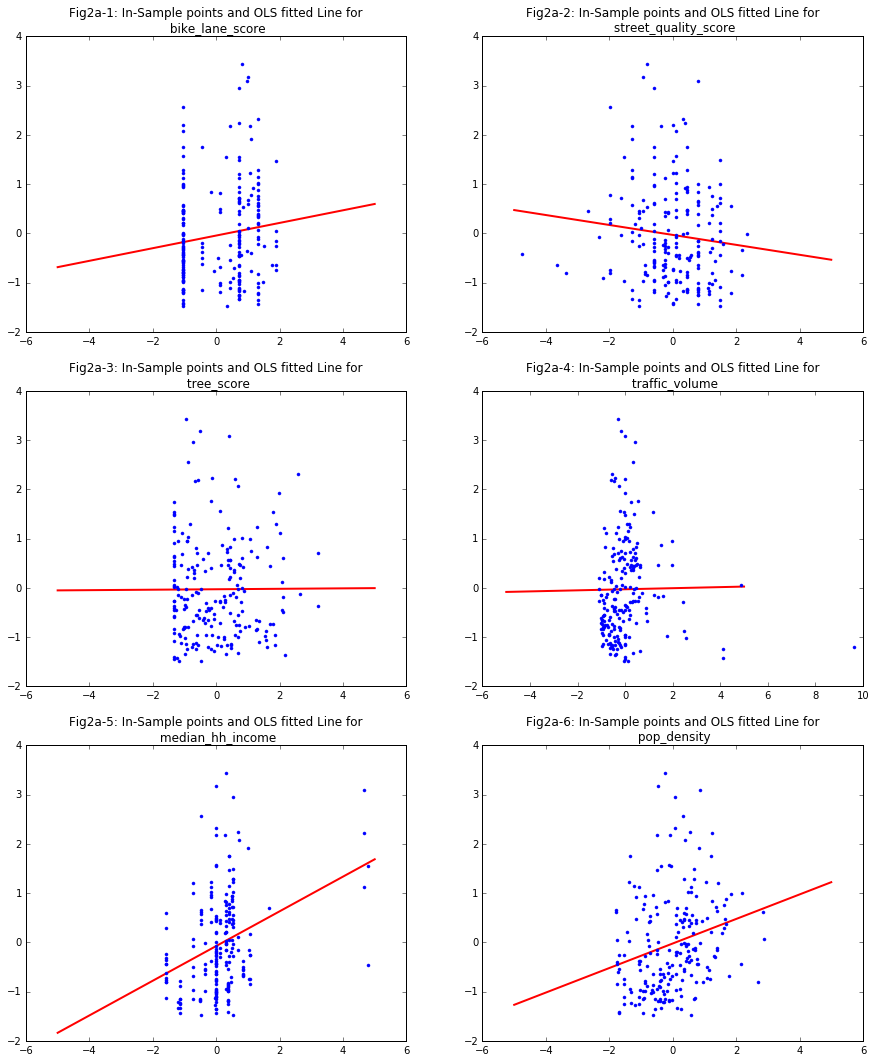

In [333]:
# Plot data points and model line for each factor
fig = plt.figure(figsize=(15,18))

for i in range(0,6):
    plt.subplot(321+i)
    xfit = np.linspace(-5, 5, 200)
    yfit = xfit * dic_lm[i].params[1] + dic_lm[i].params[0]
    plt.plot(xfit, yfit, 'r',linewidth=2)
    plt.plot(Xyn_train[publicspace_factor[i]], Xyn_train.ridership_0615, '.')
    
    plt.title('Fig2a-{}: In-Sample points and OLS fitted Line for\n {}'.format(i+1, publicspace_factor[i]))

### b. Run multivariate regression
#### on bike_lane_score, street_quality_score, tree_score, traffic_volume, median_hh_income and pop_density

In [275]:
# Run OLS regression on 
lm0 = smf.ols(formula = 'ridership_0615 ~ \
                        bike_lane_score + street_quality_score + \
                        tree_score + traffic_volume + \
                        median_hh_income + pop_density', \
                        data = Xyn_train).fit()

In [277]:
lm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ridership_0615   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     8.754
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           1.70e-08
Time:                        14:39:09   Log-Likelihood:                -277.21
No. Observations:                 212   AIC:                             568.4
Df Residuals:                     205   BIC:                             591.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               -0.0890      0.064     -1.400      0.163        -0.214     0.036
bike_lane_score          0.1207      0.064      1.882      0.061        -0.006     0.247
street_quality_score    -0.1161      0.059     -1.965      0.051        -0.233     0.000
tree_score              -0.1023      0.063     -1.634      0.104        -0.226     0.021
traffic_volume          -0.0099      0.058     -0.169      0.866        -0.125     0.105
median_hh_income         0.3382      0.066      5.096      0.000         0.207     0.469
pop_density              0.2984      0.069      4.314      0.000         0.162     0.435
==============================================================================
Omnibus:                       32.002   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.960
Skew:                           0.948   Prob(JB):                     4.69e-10
Kurtosis:                       4.126   Cond. No.                         1.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS Regression Model:
#### Ridership = 0.121 * bike_lane_score - 0.116 * street_quality_score - 0.102 * tree_score - 0.001 * traffic_volume + 0.338 * median_hh_income + 0.298 * pop_density - 0.089


### Model Evaluation

In [313]:
# Test In-Sample and OutofSample RSS and R^2
y0_pred_IS = lm0.predict(X0n_train)
err_IS = (y0_pred_IS - np.asarray(y0n_train).T).T
RSS_IS = sum(err_IS**2)
R_2_IS = 1 - np.var(err_IS)/np.var(y0n_train)
print("The Residual sum of square for OLS regression is: {0}\nThe R-squared is: {1}".format(RSS_IS, R_2_IS))

y0_pred_OS = lm0.predict(X0n_test) #compute the prediction for the test sample 
err_OS = (y0_pred_OS - np.asarray(y0n_test).T).T
RSS_OS = sum(err_OS**2)
R_2_OS = 1 - np.var(err_OS)/np.var(y0n_test)

print("\nThe Residual sum of square for OLS regression is: {0}\nThe R-squared is: {1}".format(RSS_OS, R_2_OS))


The Residual sum of square for OLS regression is: 169.67462827
The R-squared is: ridership_0615    0.203956
dtype: float64

The Residual sum of square for OLS regression is: 94.8640527069
The R-squared is: ridership_0615   -0.051753
dtype: float64


#### -- The R-squared are low and the sum of residue are high in both in-sample and out_sample tests. --

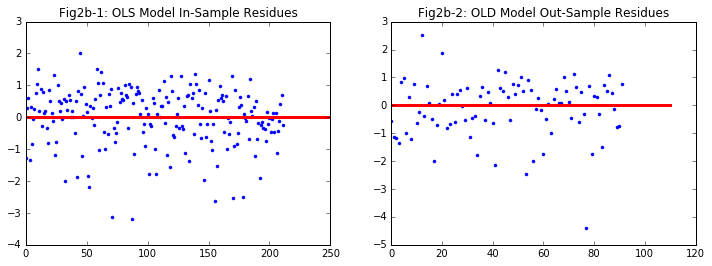

In [318]:
# Plot Residues
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121, title='Fig2b-1: OLS Model In-Sample Residues')
ax1.plot(err_IS, '.')
ax1.plot([0,250], [0,0], 'r',linewidth=3)

ax2 = fig.add_subplot(122, title='Fig2b-2: OLD Model Out-Sample Residues')
ax2.plot(err_OS, '.')
ax2.plot([0,110], [0,0], 'r',linewidth=3)

**Figure 2b-1, 2b-2**: The residues in both graphs are not evenly distributed along the sizes of the 0 horizontal line. This means that the our OLS multi-variate model does not fit the data well as we expected. It might be due to undectected outliers or that the correlation between the ridership and the public space factors is weak.

### c. Ridge Regression

In [255]:
# 4 fold cross-validation
# potential lambdas 0.1, 1.0, 2.0, 5.0, 10.0, 20.0, 30.0, 50, 80, 1e2, 2*1e2, 5*1e2, 8*1e2, 1e3

Ridge = linear_model.RidgeCV(\
                    fit_intercept=True, normalize=True, cv=4, store_cv_values=False)

lm_r = Ridge.fit(X0n_train, y0n_train)

In [256]:
#linear_model.RidgeCV?

In [257]:
print ('Selected Lambda by 4 fold cross validation:\n {0} \
       \n\nRidge Model intercept: {1} \
       \nRidge Model coefficients: {2}'     
       .format(lm_r.alpha_, lm_r.intercept_, lm_r.coef_))


Selected Lambda by 4 fold cross validation:
 10.0        

Ridge Model intercept: [-0.08598065]        
Ridge Model coefficients: [[ 0.11505314 -0.11086643 -0.09199154 -0.00828421  0.3218162   0.27982769]]


### Ridge Model:
#### Ridership = 0.115 \* bike_lane_score - 0.111 \* street_quality_score - 0.092 \* tree_score - 0.008 \* traffic_volume + 0.322 \* median_hh_income + 0.280 \* pop_density - 0.086

### Ridge Model Evaluation

In [279]:
# Test In-Sample and OutofSample RSS and R^2
y0_pred_IS_r = lm_r.predict(X0n_train)
err_IS_r = y0_pred_IS_r - y0n_train
RSS_IS_r = sum(err_IS_r**2)
R_2_IS_r = 1 - np.var(err_IS_r)/np.var(y0n_train)
print("The Residual sum of square for IS Ridge is: {0}\nThe R-squared for IS Ridge is: {1}".format(RSS_IS_r.values, R_2_IS_r.values))

y0_pred_OS_r = lm_r.predict(X0n_test) #compute the prediction for the Test set
err_OS_r = y0_pred_OS_r - y0n_test
RSS_OS_r = sum(err_OS_r**2)
R_2_OS_r = 1 - np.var(err_OS_r)/np.var(y0n_test)

print("\nThe Residual sum of square for IS Ridge is: {0}\nThe R-squared for IS Ridge is: {1}".format(RSS_OS_r.values, R_2_OS_r.values))

The Residual sum of square for IS Ridge is: [ 169.80138285]
The R-squared for IS Ridge is: [ 0.20336109]

The Residual sum of square for IS Ridge is: [ 93.43968462]
The R-squared for IS Ridge is: [-0.03576602]


#### -- The R-squared are low and the sum of residue are high in both in-sample and out_sample tests. --

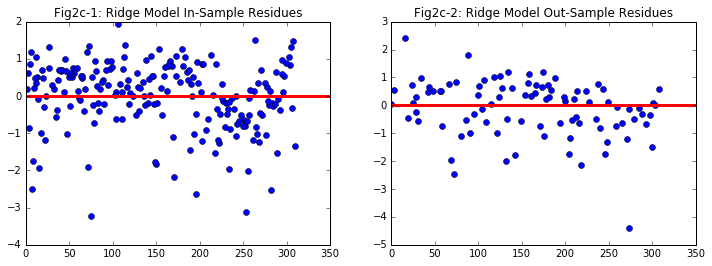

In [295]:
# Plot Residues
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121, title='Fig2c-1: Ridge Model In-Sample Residues')
ax1.plot(err_IS_r, 'o')
ax1.plot([0,350], [0,0], 'r',linewidth=3)

ax2 = fig.add_subplot(122, title='Fig2c-2: Ridge Model Out-Sample Residues')
ax2.plot(err_OS_r, 'o')
ax2.plot([0,350], [0,0], 'r',linewidth=3)

**Figure 2c-1, 2c-2**: The residues in both graphs are not evenly distributed along the sizes of the 0 horizontal line. This means that the our Ridge model does not fit the data well as we expected. It might be due to undectected outliers or that the correlation between the ridership and the public space factors is weak.

### d. LASSO Regression

In [259]:
# Possible lambdas: 0.1, 1.0, 10.0, 50, 80, 1e2, 2*1e2, 5*1e2, 8*1e2, 1e3, 1e4, 1e5

LASSO = linear_model.LassoCV(n_alphas=20, alphas=None, \
                             fit_intercept=True, normalize=True, cv=4, positive=True, random_state=222, selection='random')

lm_l = LASSO.fit(X0n_train, np.asarray(y0n_train))

In [260]:
lm_l.alphas_

array([  2.30722897e-02,   1.60396896e-02,   1.11506767e-02,
         7.75187010e-03,   5.38904425e-03,   3.74642474e-03,
         2.60448749e-03,   1.81062094e-03,   1.25873064e-03,
         8.75060470e-04,   6.08335735e-04,   4.22910621e-04,
         2.94004417e-04,   2.04389753e-04,   1.42090284e-04,
         9.87801416e-05,   6.86712428e-05,   4.77397533e-05,
         3.31883326e-05,   2.30722897e-05])

In [261]:
lm_l.mse_path_

array([[ 0.9249252 ,  1.06885727,  1.15440644,  0.81346963],
       [ 0.89497339,  1.02878341,  1.0655546 ,  0.76191968],
       [ 0.86437272,  1.00523822,  0.99253673,  0.7108604 ],
       [ 0.85190852,  0.99412225,  0.95847548,  0.6922692 ],
       [ 0.84739125,  0.98802848,  0.94112334,  0.68615124],
       [ 0.85585219,  0.97882445,  0.93215153,  0.68522398],
       [ 0.85806076,  0.97344546,  0.9273342 ,  0.68610748],
       [ 0.861082  ,  0.97019917,  0.92472476,  0.68751493],
       [ 0.86186437,  0.96818304,  0.92325385,  0.68886528],
       [ 0.86352291,  0.96689101,  0.92240069,  0.68998354],
       [ 0.86490879,  0.96605471,  0.92186962,  0.69084783],
       [ 0.86590948,  0.96549312,  0.92156952,  0.69149009],
       [ 0.86664764,  0.96511815,  0.92136678,  0.69195704],
       [ 0.86719569,  0.96487176,  0.92122596,  0.69228696],
       [ 0.86758369,  0.964692  ,  0.92114811,  0.69252902],
       [ 0.86782695,  0.96457276,  0.92108989,  0.69269553],
       [ 0.86802021,  0.

In [262]:
print ('Selected Lambda by 4 fold cross validation:\n {0} \
       \n\nLasso Model intercept: {1} \
       \nLasso Model coefficients: {2}'     
       .format(lm_l.alpha_, lm_l.intercept_, lm_l.coef_))

Selected Lambda by 4 fold cross validation:
 0.00125873063521        

Lasso Model intercept: -0.0765001577162        
Lasso Model coefficients: [ 0.08195204  0.          0.          0.          0.32143887  0.23379542]


### LASSO Model:
####  Ridership  = 0.082 \* bike_lane_score +  0.321 \* median_hh_income + 0.234 \* pop_density - 0.077

### Lasso Model Evaluation

In [263]:
# Test In-Sample and OutofSample R^2
y0_pred_IS_l = lm_l.predict(X0n_train)
y0_pred_IS_l = y0_pred_IS_l.reshape(212,1) # reshape to (212,1) from (212,)
err_IS_l = y0_pred_IS_l - y0n_train

RSS_IS_l = sum(err_IS_l**2)
R_2_IS_l = 1 - np.var(err_IS_l)/np.var(y0n_train)
print("The Redidual Sum of Square for IS is: {0}\nThe R-squared for IS Lasso is: {1}".format(RSS_IS_l.values, R_2_IS_l.values))

y0_pred_OS_l = lm_l.predict(X0n_test) #compute the prediction for the test sample 
y0_pred_OS_l = y0_pred_OS_l.reshape(92,1)
 # reshape to (212,1) from (212,)
err_OS_l = y0_pred_OS_l - y0n_test

RSS_OS_l = (err_OS_l**2).sum()
R_2_OS_l = 1 - np.var(err_OS_l)/np.var(y0n_test)

print("\nThe Redidual Sum of Square for IS is: {0}\nThe R-squared for IS Lasso is: {1}".format(RSS_OS_l.values, R_2_OS_l.values))

The Redidual Sum of Square for IS is: [ 175.33431466]
The R-squared for IS Lasso is: [ 0.17740283]

The Redidual Sum of Square for IS is: [ 92.0443251]
The R-squared for IS Lasso is: [-0.02163549]


### The R-squared are low and the sum of residue are high in both in-sample and out_sample tests.

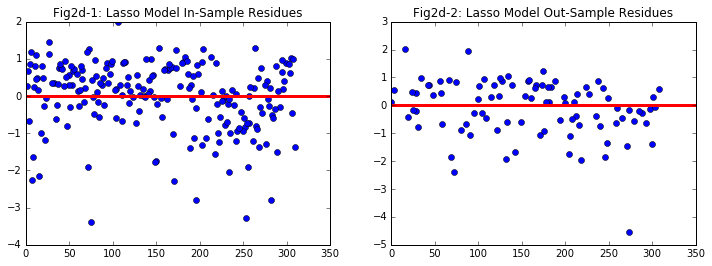

In [296]:
# Plot Residues
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121, title='Fig2d-1: Lasso Model In-Sample Residues')
ax1.plot(err_IS_l, 'o')
ax1.plot([0,350], [0,0], 'r',linewidth=3)

ax2 = fig.add_subplot(122, title='Fig2d-2: Lasso Model Out-Sample Residues')
ax2.plot(err_OS_l, 'o')
ax2.plot([0,350], [0,0], 'r',linewidth=3)


**Figure 2d-1, 2d-2**: The residues in both graphs are not evenly distributed along the sizes of the 0 horizontal line. This means that the our model does not fit the data well as we expected. It might be due to undectected outliers or that the correlation between the ridership and the public space factors is weak.

### --------------------------------------------------------------------------------------------------

## 3. Further Studies and Efforts
With further modification and colloection of data, we might need to build more models to better fit the data such as the following:

### a. Polynomial Model - Transformation on X

### b. Boxcox - Transformation on y
A Box-Cox normality plot shows graphically what the best transformation parameter is to use in boxcox to obtain a distribution that is close to normal.